## Importing Libraries

In [1]:
import pandas as pd
import requests
from lxml import html
from bs4 import BeautifulSoup
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import calendar
import re

import matplotlib.pyplot as plt
import seaborn as sb
import calendar

## Scrapping Temperature data for Dublin City from Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/Dublin"
response = requests.get(url).text
soup = BeautifulSoup(response, 'lxml')
my_table = soup.find('table', {'class':'wikitable mw-collapsible'}) #wikitable mw-collapsible mw-made-collapsible
values = my_table.findAll('td')

In [3]:
climate = []
for value in values:
    climate.append(value.get_text())

## Creating Data Frame from Scrapped Data

In [4]:
count=0
df_temperature = pd.DataFrame()
while count < 12:
    df_temperature = df_temperature.append({'average_high_celsius' : climate[count], 'daily_mean_celsius' : climate[count+13], 'average_low_celsius' : climate[count+26], 'average_precipitation_mm' : climate[count+39], 'average_precipitation_days' : climate[count+52], 'average_relative_hummidity' : climate[count+65]} ,ignore_index=True)
    count += 1

In [5]:
df_temperature

,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,17.5(63.5)\n,5.3(41.5)\n,−15.6(3.9)\n,2.4(36.3)\n,62.6(2.46)\n,8.1(46.6)\n
1,18.1(64.6)\n,5.3(41.5)\n,−13.4(7.9)\n,2.3(36.1)\n,48.8(1.92)\n,8.3(46.9)\n
2,23.4(74.1)\n,6.8(44.2)\n,−9.8(14.4)\n,3.4(38.1)\n,52.7(2.07)\n,10.2(50.4)\n
3,22.7(72.9)\n,8.3(46.9)\n,−7.2(19.0)\n,4.6(40.3)\n,54.1(2.13)\n,12.1(53.8)\n
4,26.8(80.2)\n,10.9(51.6)\n,−5.6(21.9)\n,6.9(44.4)\n,59.5(2.34)\n,14.8(58.6)\n
5,28.7(83.7)\n,13.6(56.5)\n,−0.7(30.7)\n,9.6(49.3)\n,66.7(2.63)\n,17.6(63.7)\n
6,33.1(91.6)\n,15.6(60.1)\n,1.8(35.2)\n,11.7(53.1)\n,56.2(2.21)\n,19.5(67.1)\n
7,30.6(87.1)\n,15.3(59.5)\n,0.6(33.1)\n,11.5(52.7)\n,73.3(2.89)\n,19.2(66.6)\n
8,27.6(81.7)\n,13.4(56.1)\n,−1.7(28.9)\n,9.8(49.6)\n,59.5(2.34)\n,17.0(62.6)\n
9,24.2(75.6)\n,10.5(50.9)\n,−5.6(21.9)\n,7.3(45.1)\n,79.0(3.11)\n,13.6(56.5)\n


## Formatting the scrapped data by removing special characters

In [6]:
df_temperature['average_high_celsius'] = df_temperature['average_high_celsius'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_low_celsius'] = df_temperature['average_low_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_precipitation_mm'] = df_temperature['average_precipitation_mm'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['daily_mean_celsius'] = df_temperature['daily_mean_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_relative_hummidity'] = df_temperature['average_relative_hummidity'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_precipitation_days'] = df_temperature['average_precipitation_days'].str.replace('\n','').str.replace(r"\(.*\)","")

df_temperature['Month'] = df_temperature.index + 1

In [7]:
df_temperature

,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius,Month
0,17.5,5.3,−15.6,2.4,62.6,8.1,1
1,18.1,5.3,−13.4,2.3,48.8,8.3,2
2,23.4,6.8,−9.8,3.4,52.7,10.2,3
3,22.7,8.3,−7.2,4.6,54.1,12.1,4
4,26.8,10.9,−5.6,6.9,59.5,14.8,5
5,28.7,13.6,−0.7,9.6,66.7,17.6,6
6,33.1,15.6,1.8,11.7,56.2,19.5,7
7,30.6,15.3,0.6,11.5,73.3,19.2,8
8,27.6,13.4,−1.7,9.8,59.5,17.0,9
9,24.2,10.5,−5.6,7.3,79.0,13.6,10


## Formatting the scrapped data by casting it into numeric data type

In [8]:
df_temperature["average_precipitation_days"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_temperature["average_precipitation_days"]]
df_temperature["average_precipitation_days"] = df_temperature["average_precipitation_days"].astype(float)

df_temperature["average_high_celsius"] = df_temperature["average_high_celsius"].astype(float)

df_temperature["daily_mean_celsius"] = df_temperature["daily_mean_celsius"].astype(float)

df_temperature["average_low_celsius"] = df_temperature["average_low_celsius"].astype(float)

df_temperature["average_precipitation_mm"] = df_temperature["average_precipitation_mm"].astype(float)

df_temperature["average_relative_hummidity"] = df_temperature["average_relative_hummidity"].astype(float)



## Applying Feature engineering on Scrapped data to remove highly correlated features

### Generating heatmap to get correlated features

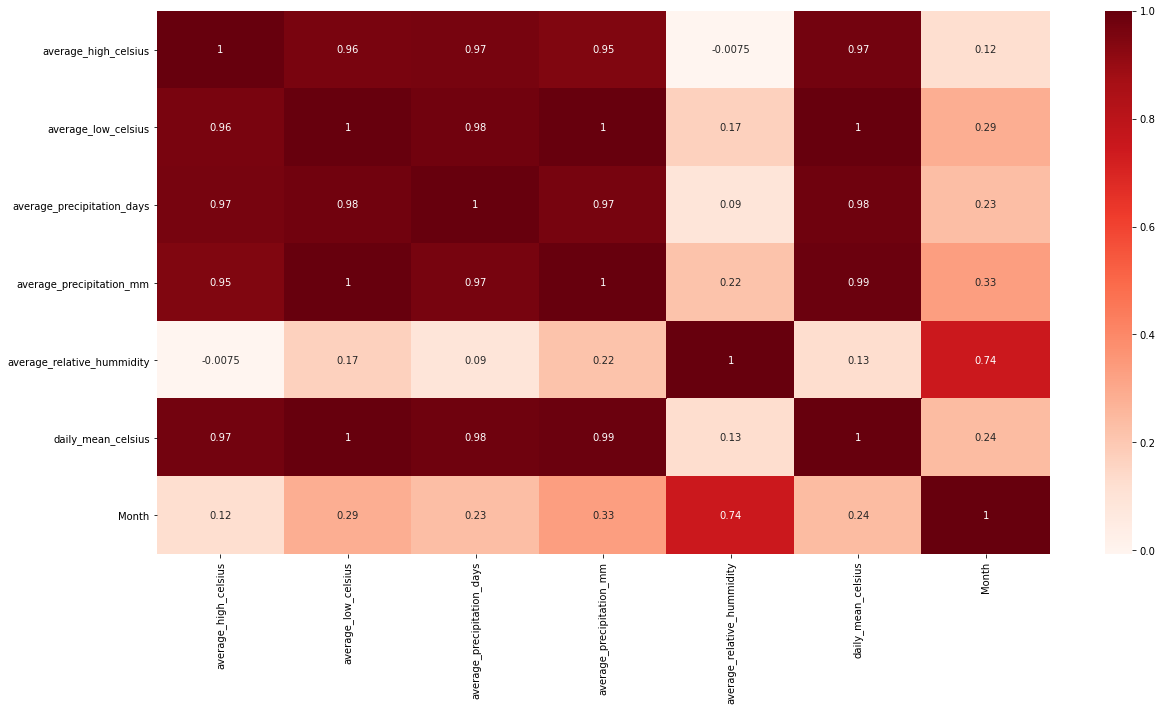

In [9]:
plt.figure(figsize = (20,10))
correlation_matrix = df_temperature.corr()
sb.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

### Dropping highly correlated features

In [10]:
df_temperature.drop('average_high_celsius', inplace=True, axis=1)
df_temperature.drop('average_low_celsius', inplace=True, axis=1)
df_temperature.drop('average_precipitation_mm', inplace=True, axis=1)
df_temperature.drop('average_precipitation_days', inplace=True, axis=1)
df_temperature

,average_relative_hummidity,daily_mean_celsius,Month
0,62.6,8.1,1
1,48.8,8.3,2
2,52.7,10.2,3
3,54.1,12.1,4
4,59.5,14.8,5
5,66.7,17.6,6
6,56.2,19.5,7
7,73.3,19.2,8
8,59.5,17.0,9
9,79.0,13.6,10


In [11]:
df_temperature.dtypes

average_relative_hummidity    float64
daily_mean_celsius            float64
Month                           int64
dtype: object

## Reading Ireland tourist srrival data from CSV provided on CSO Website

In [12]:
tourist_Ireland_df = pd.read_csv("updated_tourism.csv")
tourist_Ireland_df

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand,0.9
2,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand,12.5
3,Air and Sea Travel,2010 January,Germany,Arrivals,Thousand,45.3
4,Air and Sea Travel,2010 January,Spain,Arrivals,Thousand,68.6
...,...,...,...,...,...,...
2596,Air and Sea Travel,2022 September,Other Europe (34),Arrivals,Thousand,17.5
2597,Air and Sea Travel,2022 September,United States,Arrivals,Thousand,173.2
2598,Air and Sea Travel,2022 September,Other Transatlantic Countries(1),Arrivals,Thousand,33.0
2599,Air and Sea Travel,2022 September,United Arab Emirates,Arrivals,Thousand,28.9


## Preprocessing data by dropping the insignificant columns like Statistic Label, Direction and Unit

In [13]:
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[0], axis = 1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361.5
1,2010 January,Other UK (1),0.9
2,2010 January,Belgium,12.5
3,2010 January,Germany,45.3
4,2010 January,Spain,68.6
...,...,...,...
2596,2022 September,Other Europe (34),17.5
2597,2022 September,United States,173.2
2598,2022 September,Other Transatlantic Countries(1),33.0
2599,2022 September,United Arab Emirates,28.9


## Multiplying the Arrival number by 1000 to get actual value

In [14]:
tourist_Ireland_df["VALUE"] = (tourist_Ireland_df["VALUE"]*1000)

In [15]:
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361500.0
1,2010 January,Other UK (1),900.0
2,2010 January,Belgium,12500.0
3,2010 January,Germany,45300.0
4,2010 January,Spain,68600.0
...,...,...,...
2596,2022 September,Other Europe (34),17500.0
2597,2022 September,United States,173200.0
2598,2022 September,Other Transatlantic Countries(1),33000.0
2599,2022 September,United Arab Emirates,28900.0


## Prepeocessing data by slicing MOnth column into two meaningful columns: Year and Month

In [16]:
tourist_Ireland_df['Year'] = tourist_Ireland_df['Month'].str.slice(start=0, stop=4)

In [17]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].str.slice(start=5)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,Great Britain,361500.0,2010
1,January,Other UK (1),900.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
...,...,...,...,...
2596,September,Other Europe (34),17500.0,2022
2597,September,United States,173200.0,2022
2598,September,Other Transatlantic Countries(1),33000.0,2022
2599,September,United Arab Emirates,28900.0,2022


## Dropping rows from data where group of countries were merged into one category

In [18]:
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Countries(42)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Europe (34)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Transatlantic Countries(1)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other UK (1)')].index, inplace=True)

In [19]:
print(tourist_Ireland_df)

          Month               Country     VALUE  Year
0       January         Great Britain  361500.0  2010
2       January               Belgium   12500.0  2010
3       January               Germany   45300.0  2010
4       January                 Spain   68600.0  2010
5       January                France   48900.0  2010
...         ...                   ...       ...   ...
2592  September                Poland   39900.0  2022
2593  September              Portugal   82500.0  2022
2595  September           Switzerland   23200.0  2022
2597  September         United States  173200.0  2022
2599  September  United Arab Emirates   28900.0  2022

[1836 rows x 4 columns]


## Renaming some countries to merge it with scrapped data

In [20]:
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'Great Britain'].index, 'Country'] = 'UK'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United States'].index, 'Country'] = 'US'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United Arab Emirates'].index, 'Country'] = 'UAE'
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,UK,361500.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
5,January,France,48900.0,2010
...,...,...,...,...
2592,September,Poland,39900.0,2022
2593,September,Portugal,82500.0,2022
2595,September,Switzerland,23200.0,2022
2597,September,US,173200.0,2022


## Getting Google trends data scrapped earlier

In [21]:
def country_origin(csv_file, country):
    df = pd.read_csv(csv_file).reset_index()
    df['Country'] = country
    df = df.drop(df.columns[0], axis = 1)
    df = df.drop(df.columns[0], axis=1)
    return df
    
df_trend_Belgium = country_origin('GoogleTrends/Belgium_Irelandby_month.csv','Belgium')
df_trend_Poland = country_origin('GoogleTrends/Poland_Irelandby_month.csv','Poland')
df_trend_Portugal = country_origin('GoogleTrends/Portugal_Irelandby_month.csv','Portugal')
df_trend_France = country_origin('GoogleTrends/France_Irelandby_month.csv','France')
df_trend_Germany = country_origin('GoogleTrends/German_Irelandby_month.csv','Germany')
df_trend_Italy = country_origin('GoogleTrends/Italy_Irelandby_month.csv','Italy')
df_trend_Spain = country_origin('GoogleTrends/Spain_Irelandby_month.csv','Spain')
df_trend_UK = country_origin('GoogleTrends/UK_Irelandby_month.csv','UK')
df_trend_US = country_origin('GoogleTrends/US_Irelandby_month.csv','US')
df_trend_Switzerland = country_origin('GoogleTrends/Switzerland_Irelandby_month.csv','Switzerland')
df_trend_Netherlands = country_origin('GoogleTrends/Netherlands_Irelandby_month.csv','Netherlands')
df_trend_UAE = country_origin('GoogleTrends/UAE_Irelandby_month.csv','UAE')

df_trend = pd.concat([df_trend_Belgium, df_trend_Poland, df_trend_Portugal, df_trend_France, df_trend_Germany, df_trend_Italy, df_trend_Spain, df_trend_UK, df_trend_US, df_trend_Switzerland, df_trend_Netherlands, df_trend_UAE])
df_trend

,Year,Month,Count,Country
0,2010,1,0,Belgium
1,2010,2,0,Belgium
2,2010,3,54,Belgium
3,2010,4,0,Belgium
4,2010,5,37,Belgium
...,...,...,...,...
151,2022,8,0,UAE
152,2022,9,0,UAE
153,2022,10,0,UAE
154,2022,11,0,UAE


## Preprocessing Google Trends data by removing NaN/0 values

In [22]:
df_trend.loc[df_trend[df_trend['Count'] == 0].index, 'Count'] = None
df_trend

,Year,Month,Count,Country
0,2010,1,NaN,Belgium
1,2010,2,NaN,Belgium
2,2010,3,54.0,Belgium
3,2010,4,NaN,Belgium
4,2010,5,NaN,Belgium
...,...,...,...,...
151,2022,8,NaN,UAE
152,2022,9,NaN,UAE
153,2022,10,NaN,UAE
154,2022,11,NaN,UAE


In [23]:
df_trend['Count'].fillna(method='bfill', inplace=True)
df_trend['Count'].fillna(method='ffill', inplace=True)

In [24]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
151,2022,8,21.0,UAE
152,2022,9,21.0,UAE
153,2022,10,21.0,UAE
154,2022,11,21.0,UAE


## Removing insignificant rows from Google Trends data

In [25]:
df_trend.drop((df_trend[(df_trend["Year"] > 2021) & (df_trend["Month"] > 9)]).index, inplace = True)

In [26]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
148,2022,5,21.0,UAE
149,2022,6,21.0,UAE
150,2022,7,21.0,UAE
151,2022,8,21.0,UAE


## Preprocessing Google Trends data by formatting data types of the columns

### Converting month column from month names to month number to merge with trends data

In [27]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].apply(lambda x: datetime.strptime(x, '%B').month)

In [28]:
tourist_Ireland_df["Year"] = (tourist_Ireland_df["Year"]).astype(int)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,1,UK,361500.0,2010
2,1,Belgium,12500.0,2010
3,1,Germany,45300.0,2010
4,1,Spain,68600.0,2010
5,1,France,48900.0,2010
...,...,...,...,...
2592,9,Poland,39900.0,2022
2593,9,Portugal,82500.0,2022
2595,9,Switzerland,23200.0,2022
2597,9,US,173200.0,2022


## Merging Tourist arrival data with Dublin Temperature data on the basis of Month Column

In [29]:

df_tourist_full = pd.merge(df_trend, df_temperature, how='left', on=['Month'])
df_tourist_full

,Year,Month,Count,Country,average_relative_hummidity,daily_mean_celsius
0,2010,1,54.0,Belgium,62.6,8.1
1,2010,2,54.0,Belgium,48.8,8.3
2,2010,3,54.0,Belgium,52.7,10.2
3,2010,4,14.0,Belgium,54.1,12.1
4,2010,5,14.0,Belgium,59.5,14.8
...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,59.5,14.8
1832,2022,6,21.0,UAE,66.7,17.6
1833,2022,7,21.0,UAE,56.2,19.5
1834,2022,8,21.0,UAE,73.3,19.2


## Merging Tourist arrival data and Dublin Temperature data with Google Trends data on the basis of Country, Month and Year

In [30]:
df_tourist_full = pd.merge(df_tourist_full, tourist_Ireland_df, how='inner', on=['Country', 'Month', 'Year'])
df_tourist_full

,Year,Month,Count,Country,average_relative_hummidity,daily_mean_celsius,VALUE
0,2010,1,54.0,Belgium,62.6,8.1,12500.0
1,2010,2,54.0,Belgium,48.8,8.3,14300.0
2,2010,3,54.0,Belgium,52.7,10.2,16300.0
3,2010,4,14.0,Belgium,54.1,12.1,10200.0
4,2010,5,14.0,Belgium,59.5,14.8,12200.0
...,...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,59.5,14.8,16600.0
1832,2022,6,21.0,UAE,66.7,17.6,17500.0
1833,2022,7,21.0,UAE,56.2,19.5,21700.0
1834,2022,8,21.0,UAE,73.3,19.2,20800.0


In [31]:
df_tourist_full.dtypes

Year                            int64
Month                           int64
Count                         float64
Country                        object
average_relative_hummidity    float64
daily_mean_celsius            float64
VALUE                         float64
dtype: object

In [32]:
tourist_Ireland_df.dtypes

Month        int64
Country     object
VALUE      float64
Year         int32
dtype: object

## Saving the data in CSV format

In [33]:
df_tourist_full.to_csv('Final_Merged_data_corr.csv')

## Removing the label column from dataframe and storing it in CSV format

In [34]:
visitors = df_tourist_full["VALUE"]
visitors

0       12500.0
1       14300.0
2       16300.0
3       10200.0
4       12200.0
         ...   
1831    16600.0
1832    17500.0
1833    21700.0
1834    20800.0
1835    28900.0
Name: VALUE, Length: 1836, dtype: float64

In [35]:

visitors = pd.DataFrame(visitors)
visitors.to_csv('available_output_corr.csv')

## Dropping Label Column from Dataframe To get Features

In [36]:
tourist_data = df_tourist_full
tourist_data.drop('VALUE', inplace=True, axis=1)
tourist_data

,Year,Month,Count,Country,average_relative_hummidity,daily_mean_celsius
0,2010,1,54.0,Belgium,62.6,8.1
1,2010,2,54.0,Belgium,48.8,8.3
2,2010,3,54.0,Belgium,52.7,10.2
3,2010,4,14.0,Belgium,54.1,12.1
4,2010,5,14.0,Belgium,59.5,14.8
...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,59.5,14.8
1832,2022,6,21.0,UAE,66.7,17.6
1833,2022,7,21.0,UAE,56.2,19.5
1834,2022,8,21.0,UAE,73.3,19.2


In [37]:
tourist_data.dtypes

Year                            int64
Month                           int64
Count                         float64
Country                        object
average_relative_hummidity    float64
daily_mean_celsius            float64
dtype: object

## Feature Engineering data by one-hot encoding categorical data

### Dropping year column from data

In [38]:

tourist_data.drop('Year', inplace=True, axis=1)

### Converting month back to month name for encoding

In [39]:
tourist_data = tourist_data
tourist_data['Month'] = tourist_data['Month'].apply(lambda x: calendar.month_abbr[x])
tourist_data

,Month,Count,Country,average_relative_hummidity,daily_mean_celsius
0,Jan,54.0,Belgium,62.6,8.1
1,Feb,54.0,Belgium,48.8,8.3
2,Mar,54.0,Belgium,52.7,10.2
3,Apr,14.0,Belgium,54.1,12.1
4,May,14.0,Belgium,59.5,14.8
...,...,...,...,...,...
1831,May,21.0,UAE,59.5,14.8
1832,Jun,21.0,UAE,66.7,17.6
1833,Jul,21.0,UAE,56.2,19.5
1834,Aug,21.0,UAE,73.3,19.2


### One-hot encoding

In [40]:
tourist_data = pd.get_dummies(tourist_data)
tourist_data

,Count,average_relative_hummidity,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,54.0,62.6,8.1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,48.8,8.3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,52.7,10.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,54.1,12.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1832,21.0,66.7,17.6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1833,21.0,56.2,19.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1834,21.0,73.3,19.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
tourist_data.isna().sum()

Count                         0
average_relative_hummidity    0
daily_mean_celsius            0
Month_Apr                     0
Month_Aug                     0
Month_Dec                     0
Month_Feb                     0
Month_Jan                     0
Month_Jul                     0
Month_Jun                     0
Month_Mar                     0
Month_May                     0
Month_Nov                     0
Month_Oct                     0
Month_Sep                     0
Country_Belgium               0
Country_France                0
Country_Germany               0
Country_Italy                 0
Country_Netherlands           0
Country_Poland                0
Country_Portugal              0
Country_Spain                 0
Country_Switzerland           0
Country_UAE                   0
Country_UK                    0
Country_US                    0
dtype: int64

In [42]:
tourist_data

,Count,average_relative_hummidity,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,54.0,62.6,8.1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,48.8,8.3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,52.7,10.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,54.1,12.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1832,21.0,66.7,17.6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1833,21.0,56.2,19.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1834,21.0,73.3,19.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
tourist_data.to_csv('available_input_corr.csv')